# CV Assignment #3

#### By Kiarash Parvizi 9812165008

### Importing all needed libraries

In [201]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

### Utils

In [202]:
def print_basic_img_stats(img):
    print('basic_img_stats:')
    print(img.shape)
    print(img.dtype)
    print('avg:',np.average(img))
    print('min:',np.min(img))
    print('max:',np.max(img))
    print('-'*20)

### Problem 1.
For the image toys.gif
- 1) Read and display the image.
- 2) Compute the 2-D FFT of the image and display one full scaled copy of the magnitude
spectrum.
- 3) Compute and display properly the inverse 2-D FFT of the phase component of the spectrum
only.

(512, 512)


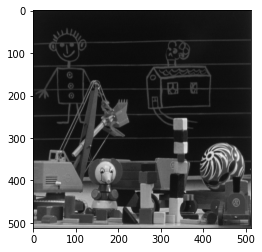

In [203]:
# read the image
img = plt.imread('toys.GIF',0)
print(img.shape)

# display
plt.imshow(img, 'gray')

basic_img_stats:
(512, 512)
uint8
avg: 57.952598571777344
min: 16
max: 242
--------------------


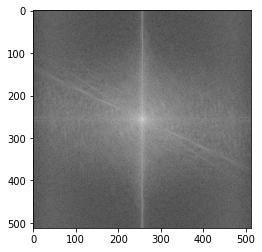

In [204]:
# take fft2
f = np.fft.fft2(img)
print_basic_img_stats(img)
# fft-shift
fshift = np.fft.fftshift(f)
# display the log transformed image
lT_img = 24*np.log(np.abs(fshift))
plt.imshow(lT_img, 'gray')

basic_img_stats:
(512, 512)
float64
avg: 107.16902542114258
min: 3.9898639947466563e-16
max: 248.5
--------------------


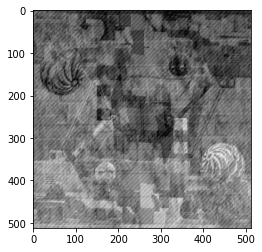

In [205]:
real = fshift.real
phases = fshift.imag

# create an empty complex array with the shape of the input image
fft_img_shift_mod = np.empty(phases.shape, dtype=complex)

# insert real and phases to the new image
#fft_img_shift_mod.real = real
fft_img_shift_mod.imag = phases

# reverse shift
fft_img_mod = np.fft.ifftshift(fft_img_shift_mod)

# reverse the 2D fourier transform
img_mod = np.fft.ifft2(fft_img_mod)

fin = np.abs(img_mod)
print_basic_img_stats(fin)
plt.imshow(fin, 'gray')

### Problem 2
For the image pepper.jpg, it is required to study the ringing effect of the Butterworth lowpass filter. Design the following filters and investigate the effect of changing the filter order and cutoff frequency on ringing. You need to display the filtered images and the shape of the filters in spatial domain. A cross-sectional view of the filters in spatial domain is required. Make sure to display the figures in a neat and organized way.
<table>
<tr>
<td>Filter Number</td>
<td>Order</td>
<td>Cutoff Frequency</td>
</tr>
<tr>
<td>1</td>
<td>1</td>
<td>50</td>
</tr>
<tr>
<td>2</td>
<td>1</td>
<td>150</td>
</tr>
<tr>
<td>3</td>
<td>5</td>
<td>50</td>
</tr>
<tr>
<td>4</td>
<td>5</td>
<td>150</td>
</tr>
</table>

basic_img_stats:
(512, 512)
uint8
avg: 104.2210807800293
min: 0
max: 230
--------------------


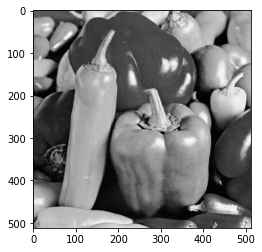

In [206]:
# Butterworth Low Pass Filter
def make_bufferworth_filter(f, D0 = 10, n = 10):
    M,N = f.shape
    H = np.zeros((M,N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            H[u,v] = 1 / (1 + (D/D0)**n)
    return H

# read the image
img = cv.imread('pepper.jpg',0)
print_basic_img_stats(img)

plt.imshow(img, cmap='gray')

basic_img_stats:
(512, 512)
uint8
avg: 104.2210807800293
min: 0
max: 230
--------------------


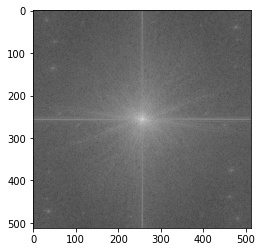

In [207]:
# take fft2
f = np.fft.fft2(img)
print_basic_img_stats(img)
# fft-shift
fshift = np.fft.fftshift(f)
# display the log transformed image
lT_img = 24*np.log(np.abs(fshift))
plt.imshow(lT_img, 'gray')

In [208]:
fTmp = fshift.copy()

options = [(1, 50), (1, 150), (5, 50), (5, 150)]
resImgs = []
for opt in options:
    H = make_bufferworth_filter(fTmp, opt[1], opt[0])
    resImgs.append(H * fTmp)

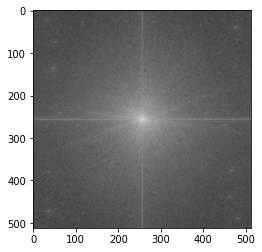

In [209]:
lT_img = 24*np.log(np.abs(resImgs[0]))
plt.imshow(lT_img, 'gray')

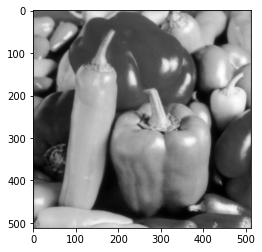

In [210]:
G = np.fft.ifftshift(resImgs[0])
output = np.abs(np.fft.ifft2(G))
plt.imshow(output, 'gray')

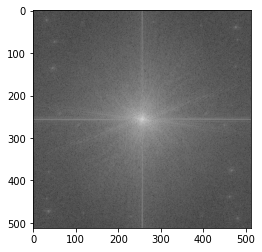

In [211]:
lT_img = 24*np.log(np.abs(resImgs[1]))
plt.imshow(lT_img, 'gray')

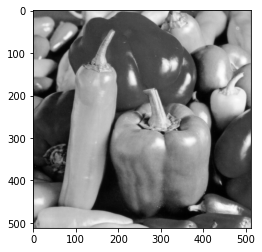

In [212]:
G = np.fft.ifftshift(resImgs[1])
output = np.abs(np.fft.ifft2(G))
plt.imshow(output, 'gray')

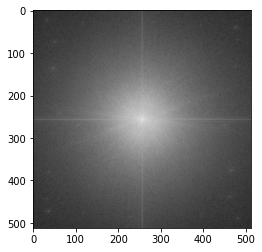

In [213]:
lT_img = 24*np.log(np.abs(resImgs[2]))
plt.imshow(lT_img, 'gray')

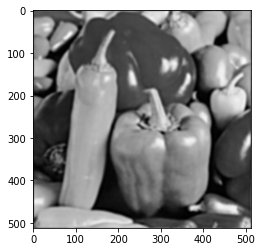

In [214]:
G = np.fft.ifftshift(resImgs[2])
output = np.abs(np.fft.ifft2(G))
plt.imshow(output, 'gray')

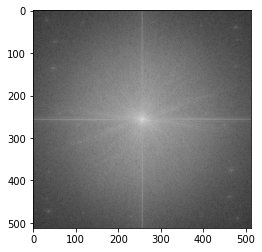

In [215]:
lT_img = 24*np.log(np.abs(resImgs[3]))
plt.imshow(lT_img, 'gray')

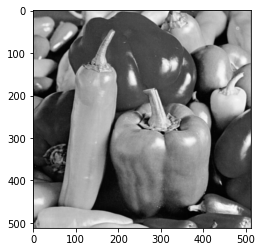

In [216]:
G = np.fft.ifftshift(resImgs[3])
output = np.abs(np.fft.ifft2(G))
plt.imshow(output, 'gray')

### Problem 3:
For the image prob2_s2012.gif
- a) Compute and display the magnitude spectrum of the image.
- b) Investigate the image in the spatial and frequency domains and determine the type of
noise that is corrupting the image.
- c) Design the proper filter and use it to restore the original image.
- d) Based on the filter in part C, can you display the noise component in spatial domain? If
so, show the image that represents the noise.

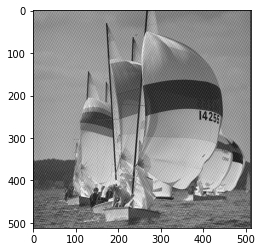

In [217]:
img = plt.imread('prob2_s2012.gif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.imshow(img, cmap = 'gray')

basic_img_stats:
(512, 512)
float64
avg: 160.73091585220183
min: 30.807136043827704
max: 347.729128489289
--------------------


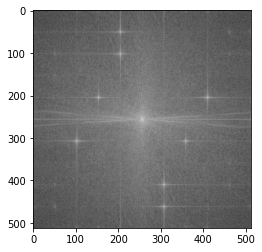

In [218]:
print_basic_img_stats(magnitude_spectrum)
plt.imshow(magnitude_spectrum, cmap = 'gray')

The type of curropting noise in this case appears to be periodic.<br/>
periodic noise is an unwanted signal that interferes with the source image or signal at a random frequency, depending on its source.

#### Algorithm for finding center points of star shapes in freq image:

51 205
102 205
205 153
205 409
256 256
307 102
307 358
409 307
461 307


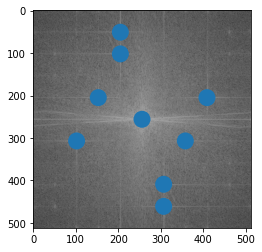

In [219]:
from matplotlib.patches import Circle

tmp = magnitude_spectrum.copy()
thresh = np.max(tmp)*0.8

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(tmp, 'gray')

fCircleLocations = []

def run_algo():
    def dfs(si, sj):
        if tmp[si,sj] < thresh:
            return -1,-1
        suX, suY = 0, 0
        cntX, cntY = 0, 0
        tmp[si,sj] = 0
        st = [(si,sj)]
        while len(st) != 0:
            x, y = st[-1]
            st = st[:-1]
            suX += x
            suY += y
            cntX += 1
            cntY += 1
            for dx in range(-1, 2):
                for dy in range(-1, 2):
                    nx, ny = dx + x, dy + y
                    if nx < 0 or ny < 0 or nx >= tmp.shape[0] or ny >= tmp.shape[1]: continue
                    if tmp[nx,ny] >= thresh:
                        st.append((nx,ny))
                        tmp[nx,ny] = 0
        #return si, sj
        return suX//cntX, suY//cntY
    for i in range(tmp.shape[0]):
        for j in range(tmp.shape[1]):
            x, y = dfs(i, j)
            if x == -1:
                continue
            circ = Circle((y,x),20)
            print(x,y)
            fCircleLocations.append((x,y))
            ax.add_patch(circ)
run_algo()

# Show the image
plt.show()

#### Remove extra-noise locations:

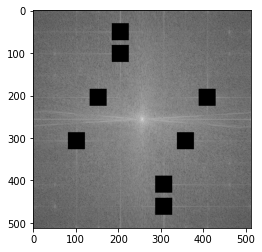

In [220]:
fshiftTmp = fshift.copy()
r = 20
noiseComp = fshiftTmp.copy()
noiseComp.fill(0+0j)

for circlePos in fCircleLocations:
    x, y = circlePos
    if abs(fshiftTmp.shape[0]//2 - x) < r and abs(fshiftTmp.shape[1]//2 - y) < r:
        continue
    for i in range(max(0, x-r), min(fshiftTmp.shape[0], x+r)):
        for j in range(max(0, y-r), min(fshiftTmp.shape[1], y+r)):
            noiseComp[i,j] = fshiftTmp[i,j]
            fshiftTmp[i,j] = 0+0j

# show the resulting freq image
plt.imshow(24*np.log(np.abs(1+fshiftTmp)), 'gray')

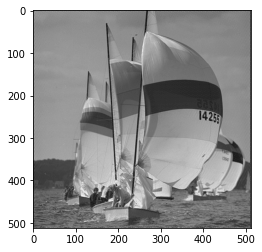

In [221]:
G = np.fft.ifftshift(fshiftTmp)
output = np.abs(np.fft.ifft2(G))
plt.imshow(output, 'gray')

As can be seen in the above image, the noise is completely gone :)
<br/>
Let's now render the noise that was removed:

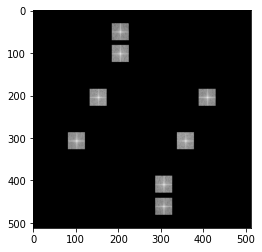

In [222]:
# show the resulting freq image
plt.imshow(24*np.log(np.abs(1+noiseComp)), 'gray')

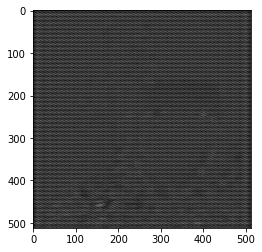

In [223]:
G = np.fft.ifftshift(noiseComp)
output = np.abs(np.fft.ifft2(G))
plt.imshow(output, 'gray')

### Problem 4:
For the image trucknoise.gif
- a) Display the magnitude spectrum of the image.
- b) Determine the type of noise in the frequency domain
- c) Can you remove the noise? Which type of filter is needed?
- d) Display the noise removed image and compute the PSNR of the image (Truck.gif is the
original image)

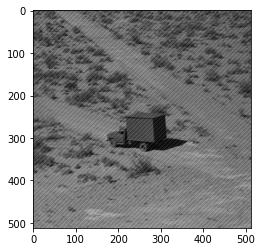

In [224]:
img = plt.imread('truckNoise.gif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.imshow(img, cmap = 'gray')

basic_img_stats:
(512, 512)
float64
avg: 156.0302679174676
min: 28.322302128686133
max: 343.01289402284704
--------------------


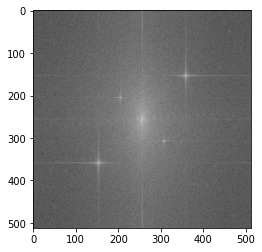

In [225]:
print_basic_img_stats(magnitude_spectrum)
plt.imshow(magnitude_spectrum, cmap = 'gray')

The type of curropting noise in this case appears to be periodic.<br/>
periodic noise is an unwanted signal that interferes with the source image or signal at a random frequency, depending on its source.

154 358
205 205
256 256
307 307
358 154


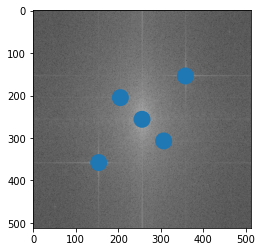

In [226]:
from matplotlib.patches import Circle

tmp = magnitude_spectrum.copy()
thresh = np.max(tmp)*0.8

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(tmp, 'gray')

fCircleLocations = []

def run_algo():
    def dfs(si, sj):
        if tmp[si,sj] < thresh:
            return -1,-1
        suX, suY = 0, 0
        cntX, cntY = 0, 0
        tmp[si,sj] = 0
        st = [(si,sj)]
        while len(st) != 0:
            x, y = st[-1]
            st = st[:-1]
            suX += x
            suY += y
            cntX += 1
            cntY += 1
            for dx in range(-1, 2):
                for dy in range(-1, 2):
                    nx, ny = dx + x, dy + y
                    if nx < 0 or ny < 0 or nx >= tmp.shape[0] or ny >= tmp.shape[1]: continue
                    if tmp[nx,ny] >= thresh:
                        st.append((nx,ny))
                        tmp[nx,ny] = 0
        #return si, sj
        return suX//cntX, suY//cntY
    for i in range(tmp.shape[0]):
        for j in range(tmp.shape[1]):
            x, y = dfs(i, j)
            if x == -1:
                continue
            circ = Circle((y,x),20)
            print(x,y)
            fCircleLocations.append((x,y))
            ax.add_patch(circ)
run_algo()

# Show the image
plt.show()

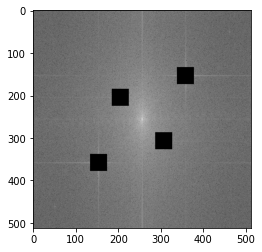

In [227]:
fshiftTmp = fshift.copy()
r = 20
noiseComp = fshiftTmp.copy()
noiseComp.fill(0+0j)

for circlePos in fCircleLocations:
    x, y = circlePos
    if abs(fshiftTmp.shape[0]//2 - x) < r and abs(fshiftTmp.shape[1]//2 - y) < r:
        continue
    for i in range(max(0, x-r), min(fshiftTmp.shape[0], x+r)):
        for j in range(max(0, y-r), min(fshiftTmp.shape[1], y+r)):
            noiseComp[i,j] = fshiftTmp[i,j]
            fshiftTmp[i,j] = 0+0j

# show the resulting freq image
plt.imshow(24*np.log(np.abs(1+fshiftTmp)), 'gray')

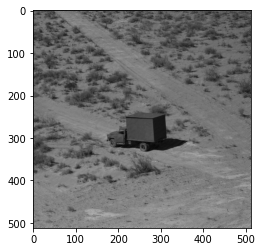

In [228]:
G = np.fft.ifftshift(fshiftTmp)
finImg = np.abs(np.fft.ifft2(G))
plt.imshow(finImg, 'gray')

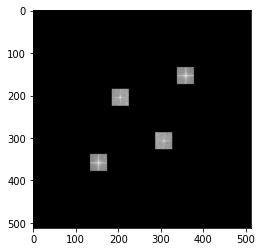

In [229]:
# show the resulting freq image
plt.imshow(24*np.log(np.abs(1+noiseComp)), 'gray')

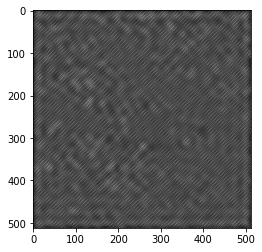

In [230]:
G = np.fft.ifftshift(noiseComp)
output = np.abs(np.fft.ifft2(G))
plt.imshow(output, 'gray')

In [231]:
import math

#psnr = cv.PSNR(finImg, img)
#print(psnr)
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

d = psnr(finImg, img)
print(d)

24.522939396830164
